Yann Lecun said, "If intelligence was a cake, unsupervised learning would be the cake, <br>supervised learning would be the icing on cake and reinforcement learning would be cherry on the cake.

Unsupervised Learning Tasks:
1. Clustering, putting similar instances together
Great for data analysis, customer segmentation, recommender systems, search engines, image segmentation. semi-supervised learning, dimensionality reduction
2. Anomaly Detection: Learn what normal data looks like and use it to detect abnormal instances
3. Density estimation: Task of estimating PDF (probability density function) of random process that generated dataset. Useful in anomaly detection as low density data are likely to be anomalies

# Clustering

1. K-Means
2. DBSCAN

Use make_blobs for experimentation

In [2]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import make_blobs

In [12]:
X, y = make_blobs(n_samples=200, centers=5)

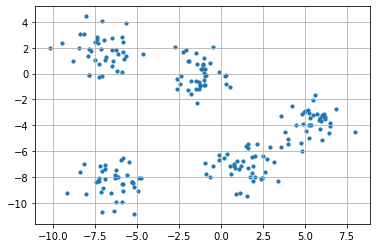

In [13]:
plt.figure(0)
plt.grid()
plt.scatter(X[:,0],X[:,1], s = 10)
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [15]:
k = 5
kmeans = KMeans(n_clusters=5)

In [16]:
y_pred = kmeans.fit_predict(X)

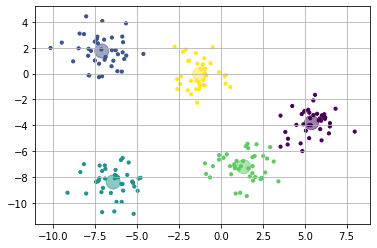

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=10, cmap='viridis')
plt.grid()
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c=list(set(y_pred)), s=200, alpha=0.5)

In [18]:
sum(y_pred == y)

119

In [20]:
sum(kmeans.labels_ == y_pred)

200

In [21]:
kmeans.inertia_

418.00855905322976

In [23]:
kmeans.score(X)

-418.00855905323004

So 119 labels out of 200 instances were incorrectly clustered

KMeans algorithm does not work well when blobs have different diameters

Assigning each instance a single cluster - Hard Clustering<br>
Assigning each instance a score per cluster - Soft Clustering

<b>Wrong initialization of cluster centroids can fail kmeans to converge. So if happen to know where cluster centroids should be(approx), pass them to KMeans class under init param

Another Solution is to run algorithm multiple times with different random initializations and keep the best one

Parameter n_init is responsible for running clustering n number of times

<b>But how does it know which is best ? What is the metric ??

Model's inertia: mean squared distance between each instance and its closest centroid. <br>
kmeans runs algorithm for 10 times and keeps the model with lowest inertia.

### Improvement on kmeans algorithm: KMeans ++

Implements smarter initialization for centroids

How to use ?<br>
Actually KMeans class by default uses kmeans++

But if you still want to use general initialization method, set init= 'random'

### Accelerated and minibatch clustering

It is already accelerated by avoiding prehand computation

Minibatch gives worse inertia but its much faster

### Finding optimal number of clusters

#### Elbow Rule
steps<br> 
1. plot k number of clusters vs inertia<br>
Inertia should drop quickly as no. of clusters go on.
2. find the number of clusters at which inertia starts to flat out<br>
Means steepness of curve is lost st some k, called elbow point
3. That is the no. of clusters you should choose.

#### Silhoutee score

steps<br>
1. plot k clusters vs silhoutee score
2. select k at which silhoutee score is maximum

Kmeans perform very poorly on elliptical data instances<br>
Scaling is considered good before applying kmeans but it does not guarantee that data will be spherical

In case of that gaussian mixture models perform better

# Image segmentation using clustering

coloured image has 3 channels for RGB

# Clustering as preprocessing

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [8]:
data = mnist.load_data()

In [9]:
(X_train, y_train), (X_test, y_test) = data

In [10]:
X_train_new = []
for array in X_train:
    X_train_new.append(array.reshape(1,-1)[0])

In [11]:
X_test_new = []
for array in X_test:
    X_test_new.append(array.reshape(1,-1)[0])

In [12]:
X_train_new = np.array(X_train_new)
X_test_new = np.array(X_test_new)

In [13]:
X_train_new = X_train_new/255

In [14]:
X_test_new = X_test_new/255

In [15]:
k = 50

In [16]:
kmeans = KMeans(n_clusters = k)

In [17]:
%time x_digits_dist = kmeans.fit_transform(X_train_new)

CPU times: user 10min 11s, sys: 11.4 s, total: 10min 23s
Wall time: 6min 10s


In [33]:
representative_digits_idx = np.argmin(x_digits_dist,axis=0)

In [51]:
x_digits_dist.shape

(60000, 50)

In [50]:
x_digits_dist

array([[9.06931504, 8.21212168, 8.04645113, ..., 8.28243364, 8.41105522,
        8.85788957],
       [9.26082331, 9.49168812, 5.91371458, ..., 9.13967874, 9.89612283,
        9.98854749],
       [9.38133262, 8.82567671, 9.35956937, ..., 9.83912414, 9.47014733,
        7.18869223],
       ...,
       [8.91030346, 7.22029614, 8.63580304, ..., 8.10805191, 9.44835884,
        8.09249957],
       [8.81466157, 7.73456411, 7.34342518, ..., 9.6230243 , 8.29344717,
        8.41055028],
       [9.11464766, 7.84698644, 8.0207379 , ..., 8.06492236, 8.48524825,
        8.49148484]])

In [49]:
representative_digits_idx.shape

(50,)

In [38]:
x_representative = X_train_new[representative_digits_idx]

In [39]:
x_representative.shape

(50, 784)

# DBSCAN